# Working with Stock Data: Resampling

In [34]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

# Import candlestick plotting
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

import pandas as pd
import pandas_datareader.data as web


style.use('ggplot') # Set style

#### Working with original Data (No MA)

In [22]:
df = pd.read_csv('Data/tsla.csv', parse_dates=True, index_col=0)

In [23]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-13,300.130005,316.799988,299.109985,315.399994,315.399994,7584900
2017-11-14,315.000000,316.350006,306.899994,308.700012,308.700012,5676100
2017-11-15,306.010010,312.489990,301.500000,311.299988,311.299988,5978700
2017-11-16,313.989990,318.140015,311.299988,312.500000,312.500000,5822100
2017-11-17,325.670013,326.670013,313.149994,315.049988,315.049988,13703600


## Resample daily data into 10-day data

In [24]:
# Using resample()
# Many options: D, Min ...
# mean() - average of the resample interval
# sum() - sum of resample interval
# ohlc() - open, high, low, close of esample interval
df_ohlc = df['Adj Close'].resample('10D').ohlc()

In [25]:
# Returns new data frame
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [26]:
# Resample the volume for the ame time interval
# Using sum() to get the total volume for that time interval
df_volume = df['Volume'].resample('10D').sum()

In [27]:
# Return a series
df_volume.head()

Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
Freq: 10D, Name: Volume, dtype: int64

## Using Matplotlib candlestick ohlc

In [28]:
# Reset Dates Index
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


In [29]:
#Convert Dates to Matplotlib mdates
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


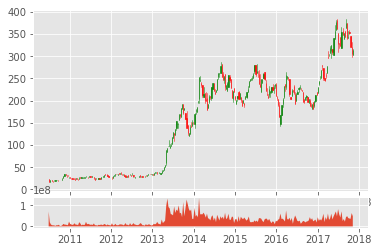

In [30]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) 

#Display mdates as x-axis dates
ax1.xaxis_date()

# Candlestick plot
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

#Plot volume on ax2
# Convert the dates to mdates as well
# Fill from 0 to y (y is volume values)
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

#### Switch to interacive plot
- Run the cell twice

In [36]:
%matplotlib

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) 

#Display mdates as x-axis dates
ax1.xaxis_date()

# Candlestick plot
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

#Plot volume on ax2
# Convert the dates to mdates as well
# Fill from 0 to y (y is volume values)
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

Using matplotlib backend: Qt5Agg
